In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import copy
%matplotlib inline

In [15]:
%cd ..

%run bandit_definitions.py
%run algorithms.py
%run sim_utilities.py

%cd figures
%ls testing/

/Users/hedi/Desktop/bandits_lab_working
/Users/hedi/Desktop/bandits_lab_working/figures
mult_scale1.pkl                        multi_scale_neurips_v3_ucbs.pkl
multi_scale2.pkl                       test.pkl
multi_scale_neurips.pkl                test101.pkl
multi_scale_neurips_final.pkl          test102.pkl
multi_scale_neurips_no_prox_rerun.pkl  test103.pkl
multi_scale_neurips_supp_proxy.pkl     test_fast_mix_gap.pkl
multi_scale_neurips_v2.pkl             test_max_ucb.pkl
multi_scale_neurips_v2_part2.pkl


<Figure size 432x288 with 0 Axes>

# Load and plot figures

In [24]:
data_dict = load_data_dict('testing/multi_scale_neurips_v2.pkl')
part2 = load_data_dict('testing/multi_scale_neurips_v2_part2.pkl')


#supp = load_data_dict('testing/multi_scale_neurips_no_prox_rerun.pkl')

In [25]:
print(data_dict.keys())
for i in data_dict['time_comp']:
    print(i) 

dict_keys(['name', 'short_name', 'T', 'N_tests', 'band_list', 'alg_list', 'results', 'scales', 'seed', 'folder', 'time_comp', 'ended'])
[616.8718938827515, 612.2164468765259, 611.8121829032898, 611.3564517498016, 2132.355077981949, 2960.218828201294, 618.7312278747559, 364.0329279899597, 12306.667515039444, 10089.124900102615]
[619.0319328308105, 619.4024629592896, 621.1573600769043, 620.3455801010132, 1932.2332692146301, 2860.764382839203, 620.3751637935638, 368.095340013504, 11767.347952127457, 9045.673959255219]
[706.6930680274963, 689.3412001132965, 615.5760171413422, 615.9925990104675, 1912.301219701767, 3221.4067289829254, 706.3144021034241, 416.9110050201416, 12938.75829577446, 7742.249782085419]
[624.6430442333221, 626.7813200950623, 627.4623599052429, 621.0862147808075]


In [26]:
new = copy.deepcopy(data_dict)

new['results'][3] += part2['results'][0]
new['time_comp'][3] += part2['time_comp'][0]
new['ended'][3] += part2['ended'][0]

/Users/hedi/anaconda3/envs/fairpy36/lib/python3.6/site-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """


[0.01, 0.1, 10, 100]


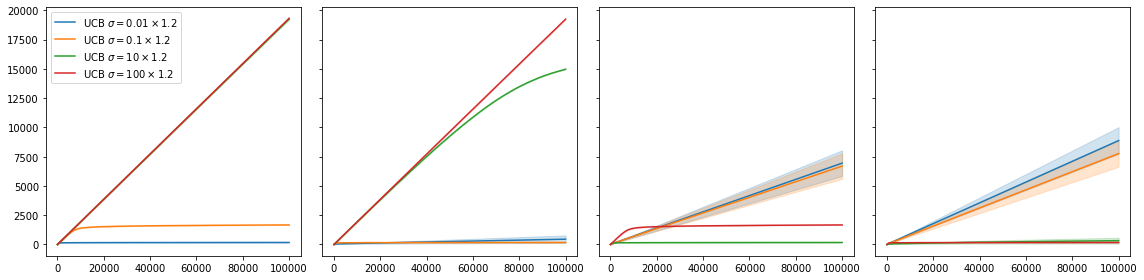

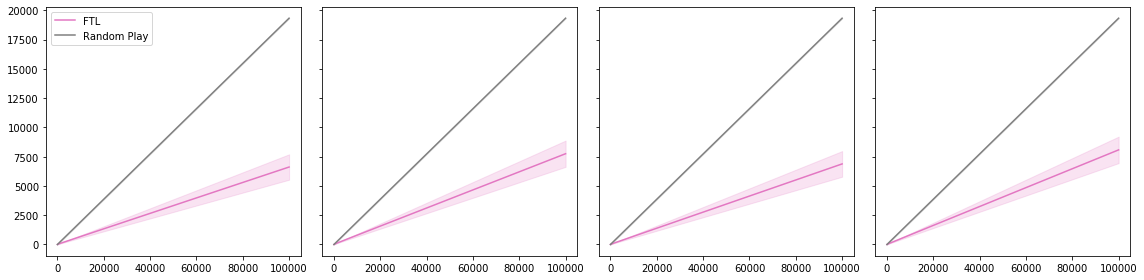

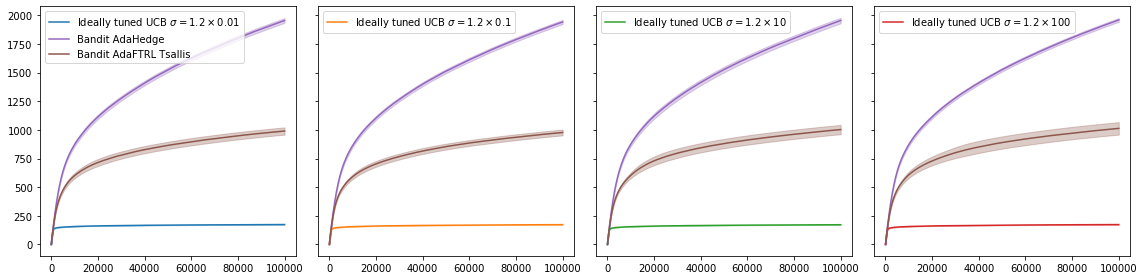

In [126]:
T = data_dict['T']

t0 = int(1e0)
t1 = T
t_slice = [int(i) for i in np.linspace(t0, t1-1, (t1-t0)/100)]
bands = []
skips = []#[0, 1, 2, 3]
#skips = range(4, 10)
#skips = [0, 1, 2, 3, 4, 5,8, 9]

skips = range(4, 10)
#fig1, axes1 = 
plot_and_save(new,
                  save_figure=True,
                  skip_algs=skips,
                  log_scale=False,
                  show_vars=True,
                  clean=True,
                  rescale=True,
                  t_slice=t_slice,
                 )
#plt.tight_layout()

skips = [0, 1, 2, 3, 4, 5,8, 9]
plot_and_save(new,
                  save_figure=True,
                  skip_algs=skips,
                  log_scale=False,
                  show_vars=True,
                  clean=True,
                  rescale=True,
                  t_slice=t_slice,
                 )
#plt.tight_layout()

skips = [0, 1, 2, 3, 4, 6, 7, 9]
plot_and_save_local(new,
                  save_figure=True,
                  skip_algs=skips,
                  log_scale=False,
                  show_vars=True,
                  clean=True,
                  rescale=True,
                  t_slice=t_slice,
                 )
#plt.tight_layout()


print(data_dict['scales'])

In [ ]:
skips = [0, 1, 2, 3, 4, 5, 6, 9, 10]
plot_and_save(data_dict,
              save_figure=False,
              skip_algs=skips,
              log_scale=False,
              show_vars=True,
              clean=True,
              rescale=True,
              t_slice=t_slice,
             )
plt.tight_layout()

IndexError: list index out of range

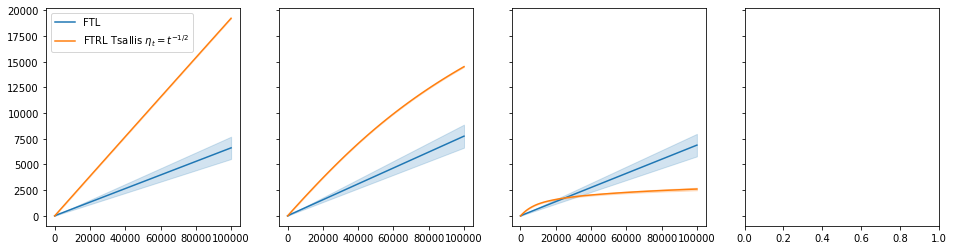

In [118]:
skips = [0, 1, 2, 3, 4, 5, 7, 8, 10]
plot_and_save(data_dict,
              save_figure=False,
              skip_algs=skips,
              log_scale=False,
              show_vars=True,
              clean=True,
              rescale=True,
              t_slice=t_slice,
             )
plt.tight_layout()

In [121]:
def plot_and_save_local(data_dict, save_figure=False, skip_algs=[], log_scale=True, show_vars=True, clean=False, **kwargs):
    """ Used to hard save the data """
    colors = plt.get_cmap('tab10').colors
    T = data_dict['T']
    if 't_slice' in kwargs:
        t_slice = kwargs['t_slice']
    else:
        t_slice = range(T)
    nplots = len(data_dict['band_list'])
    fig, axes = plt.subplots(nrows=1, ncols=nplots, figsize=(16, 4), sharey='all')
    for i, _ in enumerate(data_dict['band_list']):
        if nplots >= 2:# weird : axes[i] does not work when there is only 1 subplot
            ax = axes[i]
        else:
            ax = axes
            
        alg = data_dict['alg_list'][i]
        mean_reg, var_reg = data_dict['results'][i][i]
        if ('rescale' in kwargs.keys()) & kwargs['rescale']:
            mean_reg = np.array(mean_reg) / data_dict['scales'][i]
            var_reg = np.array(var_reg) / np.square(data_dict['scales'][i])
        if log_scale:
            ax.set_xscale("log")#, nonposx='clip')
        if clean:
            alg_label = r'Ideally tuned UCB $\sigma = 1.2 \times {}$'.format([0.01, 0.1, 10, 100][i])
        else:
            alg_label = str(j)+": "+alg.label
        ax.plot(t_slice, mean_reg[t_slice], label=alg_label, color=colors[i])
        if show_vars:
            ax.fill_between(t_slice, mean_reg[t_slice]+ 2*np.sqrt(var_reg[t_slice]  / 300), mean_reg[t_slice]- 2*np.sqrt(var_reg[t_slice] /300), alpha=0.3, color=colors[i])
            
        skipped = 0
        for j, alg in enumerate(data_dict['alg_list']):
            if j in skip_algs or not(data_dict['ended'][i][j]):
                skipped +=1
                continue
            mean_reg, var_reg = data_dict['results'][i][j]
            if ('rescale' in kwargs.keys()) & kwargs['rescale']:
                mean_reg = np.array(mean_reg) / data_dict['scales'][i]
                var_reg = np.array(var_reg) / np.square(data_dict['scales'][i])
            if log_scale:
                ax.set_xscale("log")#, nonposx='clip')
            if clean:
                alg_label = alg.label
            else:
                alg_label = str(j)+": "+alg.label
            if i==0:
                ax.plot(t_slice, mean_reg[t_slice], label=alg_label, color=colors[j-skipped + 4])
            else:
                ax.plot(t_slice, mean_reg[t_slice], color=colors[j-skipped + 4])
            if show_vars:
                ax.fill_between(t_slice, mean_reg[t_slice]+ 2*np.sqrt(var_reg[t_slice] / 300), mean_reg[t_slice]- 2*np.sqrt(var_reg[t_slice] / 300), alpha=0.3, color=colors[j-skipped + 4])
                # ax.plot(t_slice, mean_reg[t_slice]+ np.sqrt(var_reg[t_slice]), '--', alpha=0.3, color=colors[j-skipped])
                # ax.plot(t_slice, mean_reg[t_slice]- np.sqrt(var_reg[t_slice]), '--', alpha=0.3, color=colors[j-skipped])
        
        
        plt.tight_layout()
        ax.legend(loc=2)
        
    if save_figure:
        plt.tight_layout()
        #save_data_dict(data_dict)
        path = uniquify(data_dict['short_name']+'.pdf')
        plt.savefig(path, format='pdf')
        
    return fig, axes


In [149]:
a = np.zeros((3, 9))

for i in range(3):
    print('newband')
    for j in range(9):
        a[i, j] = new['time_comp'][i][j]
        print(new['time_comp'][i][j])

newband
616.8718938827515
612.2164468765259
611.8121829032898
611.3564517498016
2132.355077981949
2960.218828201294
618.7312278747559
364.0329279899597
12306.667515039444
newband
619.0319328308105
619.4024629592896
621.1573600769043
620.3455801010132
1932.2332692146301
2860.764382839203
620.3751637935638
368.095340013504
11767.347952127457
newband
706.6930680274963
689.3412001132965
615.5760171413422
615.9925990104675
1912.301219701767
3221.4067289829254
706.3144021034241
416.9110050201416
12938.75829577446


In [152]:
for i in range(9):
    print(new['alg_list'][i].label)
    print(np.mean(a, axis=0)[i]  / 300 / 1.27) 

UCB $\sigma = 0.01 \times 1.2$
1.699559837918686
UCB $\sigma = 0.1 \times 1.2 $
1.6806300174532913
UCB $\sigma = 10 \times 1.2$
1.617275205705631
UCB $\sigma = 100 \times 1.2 $
1.6165307356616643
Exp3 
5.229124730444747
Bandit AdaHedge
7.911102309731777
FTL
1.7020304407451827
Random Play
1.0052837034327256
Bandit AdaFTRL Tsallis
32.38212927641414


/Users/hedi/anaconda3/envs/fairpy36/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


IndexError: list index out of range

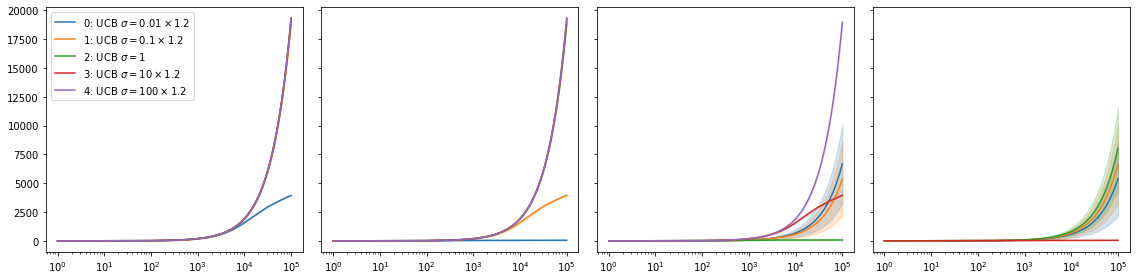

In [17]:
data_dict = load_data_dict('testing/multi_scale_neurips_v3_ucbs.pkl')
T = data_dict['T']

t0 = int(1e0)
t1 = T
t_slice = [int(i) for i in np.linspace(t0, t1-1, (t1-t0)/100)]
bands = []
skips = []#[0, 1, 2, 3]
#skips = range(4, 10)
#skips = [0, 1, 2, 3, 4, 5,8, 9]

#fig1, axes1 = 
plot_and_save(data_dict,
                  save_figure=False,
                  skip_algs=skips,
                  log_scale=True,
                  show_vars=True,
                  clean=False,
                  rescale=True,
                  t_slice=t_slice,
                 )
#plt.tight_layout()

1.4142135623730951